In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress

xls = pd.ExcelFile("../Data/Data_Tables_LGA_Recorded_Offences_Year_Ending_September_2021.xlsx")
df = pd.read_excel (xls,'Table 01')

In [5]:
df.head(40)

,Year,Year ending,Police Region,Local Government Area,Offence Count,"Rate per 100,000 population"
0,2021,September,1 North West Metro,Banyule,7773,5913.816707
1,2021,September,1 North West Metro,Brimbank,17741,8746.256173
2,2021,September,1 North West Metro,Darebin,13379,8114.424138
3,2021,September,1 North West Metro,Hobsons Bay,5769,5925.844216
4,2021,September,1 North West Metro,Hume,18882,7689.258292
5,2021,September,1 North West Metro,Maribyrnong,8640,9198.897080
6,2021,September,1 North West Metro,Melbourne,34949,20868.034593
7,2021,September,1 North West Metro,Melton,12550,6979.250087
8,2021,September,1 North West Metro,Moonee Valley,7521,5750.404534
9,2021,September,1 North West Metro,Moreland,12128,6485.096509


## ANALYSIS OF "OFFENCES RECORDED" OVER 10 YEARS FOR EACH POLICE REGION

In [6]:
c = df.loc[df['Local Government Area']=='Total',['Year','Police Region','Offence Count']]
c

,Year,Police Region,Offence Count
14,2021,1 North West Metro,185188
40,2021,2 Eastern,116873
51,2021,3 Southern Metro,110099
82,2021,4 Western,81133
84,2021,Justice Institutions and Immigration Facilities,2661
86,2021,Unincorporated Vic,95
101,2020,1 North West Metro,209170
127,2020,2 Eastern,123916
138,2020,3 Southern Metro,129471
169,2020,4 Western,85908


In [7]:
cdf = c.groupby('Year')['Offence Count'].agg(['sum','mean','median',np.var,np.std])
cdf.head(10)

,sum,mean,median,var,std
Year,,,,,
2012,410123,68353.833333,75167.0,3.916443e+09,62581.492265
2013,432809,72134.833333,80423.0,4.197878e+09,64791.029859
2014,455065,75844.166667,85525.5,4.666974e+09,68315.256315
2015,486115,81019.166667,91157.0,5.236091e+09,72360.837086
2016,543176,90529.333333,102568.5,6.430447e+09,80190.068082
2017,516397,86066.166667,100388.5,5.565808e+09,74604.343523
2018,507476,84579.333333,97226.0,5.549195e+09,74492.920541
2019,528419,88069.833333,103489.0,5.806496e+09,76200.366906
2020,551334,91889.000000,104912.0,6.519282e+09,80742.071834


In [8]:
Total = c.groupby(['Year'])['Offence Count'].agg('sum')
Total.describe()

count        10.000000
mean     492696.300000
std       47044.141685
min      410123.000000
25%      462827.500000
50%      501762.500000
75%      525413.500000
max      551334.000000
Name: Offence Count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

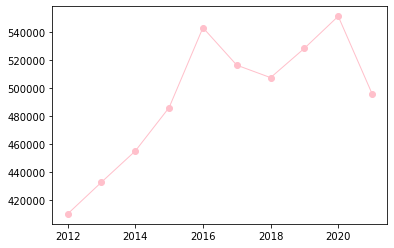

In [9]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.show

In [11]:
NorthWestMetro = c[c['Police Region']=='1 North West Metro']
del NorthWestMetro['Police Region']
NorthWestMetro = NorthWestMetro.groupby(['Year'])['Offence Count'].agg('sum')
NorthWestMetro

Year
2012    165106
2013    169789
2014    178447
2015    188337
2016    208356
2017    192517
2018    195176
2019    197038
2020    209170
2021    185188
Name: Offence Count, dtype: int64

In [12]:
Eastern = c[c['Police Region']=='2 Eastern']
del Eastern['Police Region']
Eastern= Eastern.groupby(['Year'])['Offence Count'].agg('sum')
Eastern

Year
2012     87500
2013     92514
2014    100826
2015    105790
2016    118661
2017    115983
2018    111757
2019    121120
2020    123916
2021    116873
Name: Offence Count, dtype: int64

In [13]:
SouthernMetro = c[c['Police Region']=='3 Southern Metro']
del SouthernMetro['Police Region']
SouthernMetro = SouthernMetro.groupby(['Year'])["Offence Count"].agg('sum')
SouthernMetro

Year
2012     93543
2013    100756
2014    104437
2015    114217
2016    127875
2017    120678
2018    115061
2019    121225
2020    129471
2021    110099
Name: Offence Count, dtype: int64

In [14]:
Western = c[c['Police Region']=='4 Western']
del Western['Police Region']
Western = Western.groupby(['Year'])['Offence Count'].agg('sum')
Western

Year
2012    62834
2013    68332
2014    70225
2015    76524
2016    86476
2017    84794
2018    82695
2019    85858
2020    85908
2021    81133
Name: Offence Count, dtype: int64

In [15]:
Justice = c[c['Police Region']=='Justice Institutions and Immigration Facilities']
del Justice['Police Region']
Justice = Justice.groupby(['Year'])['Offence Count'].agg('sum')
Justice

Year
2012    1017
2013    1345
2014    1016
2015    1130
2016    1676
2017    2298
2018    2674
2019    3017
2020    2783
2021    2661
Name: Offence Count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

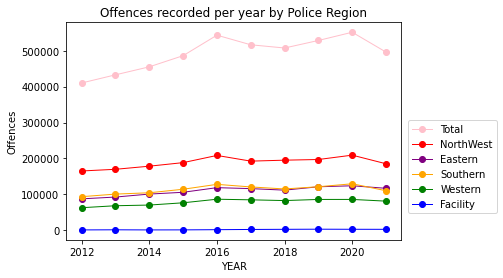

<Figure size 57600x43200 with 0 Axes>

In [17]:
x = np.arange(2012,2022,1)
plt.plot(x,Total, marker="o", color="pink", linewidth=1, label="Total")
plt.plot(x,NorthWestMetro, marker="o", color="red", linewidth=1, label="NorthWest")
plt.plot(x,Eastern, marker="o", color="purple", linewidth=1, label="Eastern")
plt.plot(x,SouthernMetro, marker="o", color="orange", linewidth=1, label="Southern")
plt.plot(x,Western, marker="o", color="green", linewidth=1, label="Western")
plt.plot(x,Justice, marker="o", color="blue", linewidth=1, label="Facility")
plt.legend(loc='lower right', bbox_to_anchor=(1.3, 0.1))
plt.title("Offences recorded per year by Police Region")
plt.xlabel("YEAR")
plt.ylabel("Offences")
plt.figure(figsize=(800,600))
plt.show